In [1]:
import  pandas as pd

In [3]:
df=pd.read_csv('Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
from sklearn.model_selection import train_test_split
train ,test=train_test_split(df,test_size=0.2,random_state=42)
train=train.sort_values('time_study')
test=test.sort_values('time_study')
X_train, X_test = train[['time_study']], test[['time_study']]
y_train, y_test = train['Marks'], test['Marks']

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVR

In [9]:
svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(kernel='poly')

In [10]:
from matplotlib import pyplot as plt

In [11]:
#### Model prediction for train dataset ####
train['linear_svr_pred'] = svr_lin.predict(X_train_scaled)
train['rbf_svr_pred'] = svr_rbf.predict(X_train_scaled)
train['poly_svr_pred'] = svr_poly.predict(X_train_scaled)

Text(0, 0.5, 'Marks')

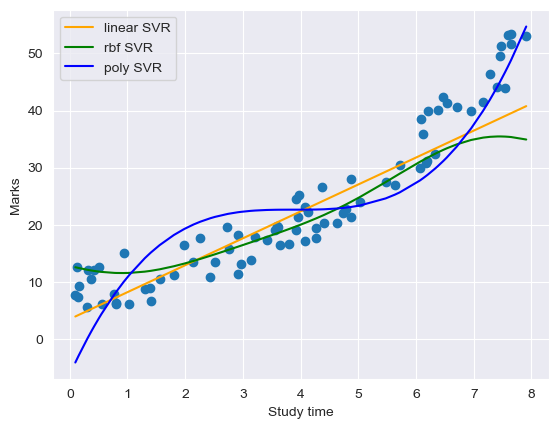

In [12]:
#### Visualization ####
plt.scatter(train['time_study'], train['Marks'])
plt.plot(train['time_study'], train['linear_svr_pred'], color = 'orange', label = 'linear SVR')
plt.plot(train['time_study'], train['rbf_svr_pred'], color = 'green', label = 'rbf SVR')
plt.plot(train['time_study'], train['poly_svr_pred'], color = 'blue', label = 'poly SVR')
plt.legend()
plt.xlabel('Study time')
plt.ylabel('Marks')

In [15]:
import numpy as np
from sklearn import metrics

#### Test dataset - metrics ####
y_test_pred = svr_lin.predict(X_test_scaled)
r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
print(f'r2: {r2_score}')
print(f'rmse: {rmse}')


r2: 0.83
rmse: 6.7


Text(0, 0.5, 'Actual')

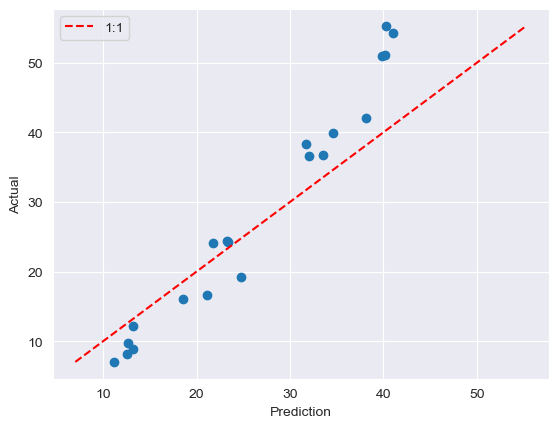

In [17]:
#### Test dataset - plot ####
y_test_pred = svr_lin.predict(X_test_scaled)
min_x = min(min(y_test_pred), min(y_test))
max_x = max(max(y_test_pred), max(y_test))
plt.scatter(y_test_pred, y_test)
plt.plot([min_x,max_x], [min_x,max_x], 'r--', label = '1:1')
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Actual')

## prediction using the Radial Basis Function svr_rbf = SVR(kernel = 'rbf')

In [18]:
# import numpy as np
# from sklearn import metrics
# 
# #### Test dataset - metrics ####
# y_test_pred = svr_rbf.predict(X_test_scaled)
# r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
# rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
# print(f'r2: {r2_score}')
# print(f'rmse: {rmse}')


# output:-
# r2: 0.69
# rmse: 9.03

r2: 0.69
rmse: 9.03


## prediction using the polynomial svr_poly = SVR(kernel = 'poly')

In [24]:
# import numpy as np
# from sklearn import metrics
# 
# #### Test dataset - metrics ####
# y_test_pred = svr_poly.predict(X_test_scaled)
# r2_score = round(metrics.r2_score(y_test, y_test_pred),2)
# rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)
# print(f'r2: {r2_score}')
# print(f'rmse: {rmse}')


# output:-
# r2: 0.83
# rmse: 6.66

SyntaxError: invalid syntax (1275751850.py, line 12)